<a href="https://colab.research.google.com/github/PraveenPrabhat125/DataScience-/blob/main/Zomato_data_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv('zomato.csv', encoding='latin-1')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
df.shape

(9551, 21)

## In EDA what all things we do
1. Missing values
2. Numerical variables
3. Categorical varibles
4. Fiding relationship betweeen features

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [10]:
[features for features in df.columns if df[features].isnull.sum() > 0]

AttributeError: 'function' object has no attribute 'sum'

In [11]:
[features for features in df.columns if df[features].isnull().sum() > 0]


['Cuisines']

In [12]:
features_list = [features for features in df.columns]

In [13]:
features_list = list(df.columns)
for x in features_list:
  print()

In [14]:
df[[feature for feature in df.columns if df[feature].isnull().sum() > 0]]

,Cuisines
0,"French, Japanese, Desserts"
1,Japanese
2,"Seafood, Asian, Filipino, Indian"
3,"Japanese, Sushi"
4,"Japanese, Korean"
...,...
9546,Turkish
9547,"World Cuisine, Patisserie, Cafe"
9548,"Italian, World Cuisine"
9549,Restaurant Cafe


In [15]:
df_country = pd.read_excel('Country-Code.xlsx')

In [16]:
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [17]:
df_country.shape

(15, 2)

In [18]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [19]:
df_country.describe()

,Country Code
count,15.000000
mean,137.933333
std,80.009345
min,1.000000
25%,65.500000
50%,166.000000
75%,199.500000
max,216.000000


In [21]:
### LEft join [merge]
merged_df = df.merge(df_country, on = 'Country Code', how='left')


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### No of records

In [27]:
final_df = merged_df

In [28]:
final_df['Country'].value_counts()

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [32]:
country_names  =  final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [36]:
 country_val =  final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7fbe3a3917e0>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Qatar'),
  Text(1.0999533462179636, -0.010130949802716446, 'Sri Lanka'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

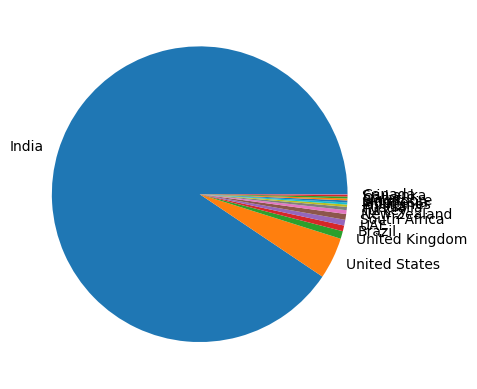

In [38]:
# Pie chart
plt.pie(country_val, labels = country_names )

([<matplotlib.patches.Wedge at 0x7fbe39fbc070>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.392%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.735%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.873%')])

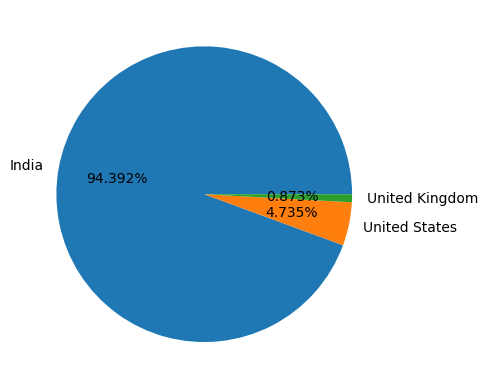

In [43]:
# Top 3 countries that uses zomato
plt.pie(country_val[:3], labels = country_names[:3], autopct = '%1.3f%%')

Observation: Zomato max record/transaction are from India then us, uk

In [45]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [62]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [63]:
# DF
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [67]:
# DF
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns = {0: 'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

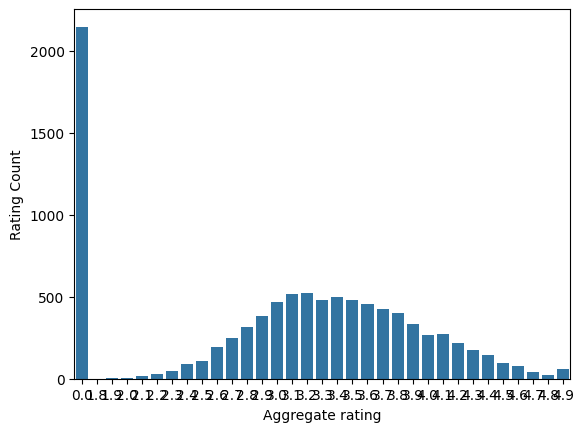

In [69]:
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data = ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

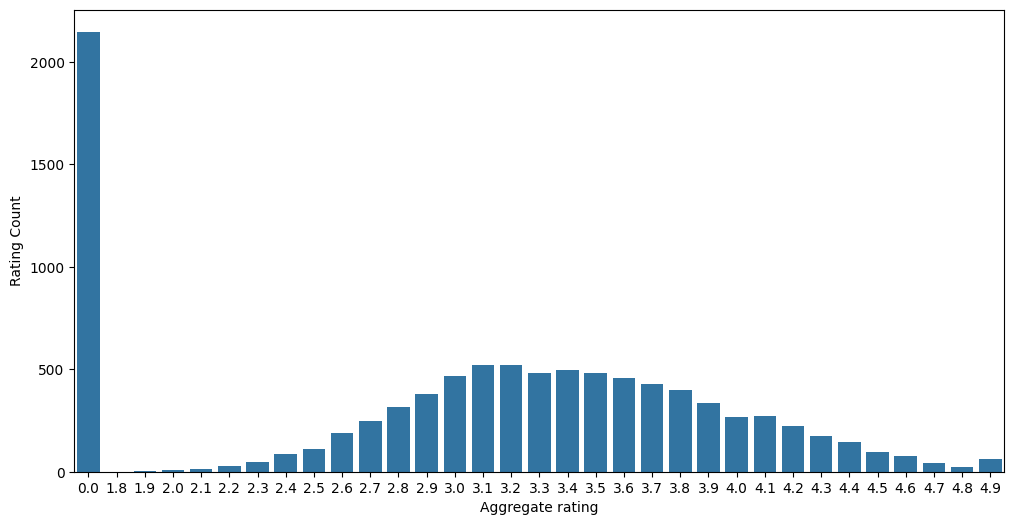

In [71]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', data = ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

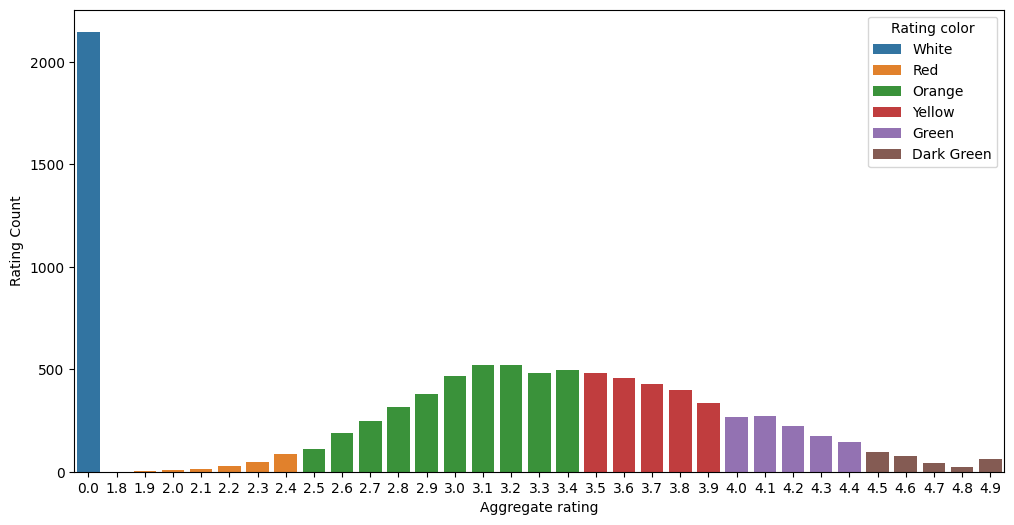

In [73]:
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', data = ratings)

ValueError: Invalid RGBA argument: 'greeen'

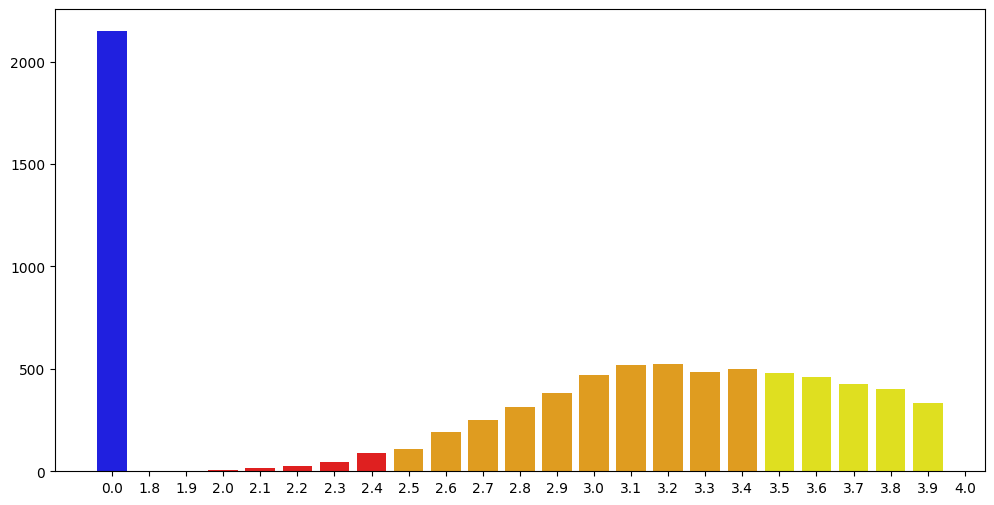

In [80]:
#Now if you want to map the color also then
sns.barplot(x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', data = ratings, palette = ['blue', 'red', 'orange', 'yellow', 'greeen', 'green'])

In [49]:
data = {
    'Customer ID': [1, 1, 2, 2, 2, 3, 3, 4],
    'Transaction Amount': [100, 150, 200, 250, 300, 350, 400, 450]
}

In [51]:
data

{'Customer ID': [1, 1, 2, 2, 2, 3, 3, 4],
 'Transaction Amount': [100, 150, 200, 250, 300, 350, 400, 450]}

In [59]:
data_df =  pd.DataFrame(data)
data_df

,Customer ID,Transaction Amount
0,1,100
1,1,150
2,2,200
3,2,250
4,2,300
5,3,350
6,3,400
7,4,450


In [57]:
data_df.groupby(['Customer ID', 'Transaction Amount']).size()

Customer ID  Transaction Amount
1            100                   1
             150                   1
2            200                   1
             250                   1
             300                   1
3            350                   1
             400                   1
4            450                   1
dtype: int64

In [58]:
data_df.groupby(['Customer ID']).size()

Customer ID
1    2
2    3
3    2
4    1
dtype: int64

In [61]:
data_df.groupby('Customer ID')['Transaction Amount'].sum()

Customer ID
1    250
2    750
3    750
4    450
Name: Transaction Amount, dtype: int64